# **Introduction**

From Amazon, Microsoft, Google to Wayfair, the technology industry is currently shaken by massive layoffs since mid-2022.

This dataset includes information on 450+ technology companies; and has the potential to gain insights on technology industry trends and make informed decisions for a career or business.

In this notebook we will look at EDA of Employee layoffs.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams.update({'font.size': 22})

In [29]:
FILEPATH = "G:/CODE_playground/py/data_science/colab notebooks/tech layoffs analysis/data/tech_layoffs.csv"
techlayoff_data = FILEPATH

df = pd.read_csv(techlayoff_data)
df

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,NaN
1,VideoAmp,Unclear,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private,NaN
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private,NaN
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private,NaN
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private,"Per Axios, 22 of the employees laid off were f..."
...,...,...,...,...,...,...,...,...,...
484,Salesforce,9090,Unclear,1/4/2023,"enterprise tech, analytics",San Francisco,New York Times,Public,NaN
485,Oracle,Unclear,Unclear,8/1/2022,"SaaS, enterprise software",Austin,The Information,Public,The Information reported thousands of people w...
486,LivePerson,Unclear,Unclear,9/15/2022,Customer service,New York,LinkedIn,Public,NaN
487,Skillz,Unclear,Unclear,8/29/2022,"Mobile Apps, Gaming",San Francisco,Seeking Alpha,Public,NaN


Check for value anomalities

In [30]:
from pandas.api.types import is_numeric_dtype

num_cols = ['total_layoffs','impacted_workforce_percentage']
cols = df.columns

for i in cols:
    if is_numeric_dtype(df[i]) == False:
        print(str(i) + " is NOT numeric type")
    else:
        print(str(i) + " is numeric type")

company is NOT numeric type
total_layoffs is NOT numeric type
impacted_workforce_percentage is NOT numeric type
reported_date is NOT numeric type
industry is NOT numeric type
headquarter_location is NOT numeric type
sources is NOT numeric type
status is NOT numeric type
additional_notes is NOT numeric type


# Data cleaning and preprocessing

In [31]:
# check for null values
df.isnull().sum()

company                            0
total_layoffs                      0
impacted_workforce_percentage      0
reported_date                      0
industry                           0
headquarter_location               0
sources                            0
status                             0
additional_notes                 467
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   company                        489 non-null    object
 1   total_layoffs                  489 non-null    object
 2   impacted_workforce_percentage  489 non-null    object
 3   reported_date                  489 non-null    object
 4   industry                       489 non-null    object
 5   headquarter_location           489 non-null    object
 6   sources                        489 non-null    object
 7   status                         489 non-null    object
 8   additional_notes               22 non-null     object
dtypes: object(9)
memory usage: 34.5+ KB


It looks like all columns have string characters. We need to be careful about this while on EDA

In [33]:
# drop 'additional_notes' column
df.drop(columns=['additional_notes'], inplace=True)
df.columns

Index(['company', 'total_layoffs', 'impacted_workforce_percentage',
       'reported_date', 'industry', 'headquarter_location', 'sources',
       'status'],
      dtype='object')

In [34]:
df['reported_date'] = df['reported_date'].astype('datetime64')
df['Month'] = df['reported_date'].dt.month
df['Year'] = df['reported_date'].dt.strftime('%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   company                        489 non-null    object        
 1   total_layoffs                  489 non-null    object        
 2   impacted_workforce_percentage  489 non-null    object        
 3   reported_date                  489 non-null    datetime64[ns]
 4   industry                       489 non-null    object        
 5   headquarter_location           489 non-null    object        
 6   sources                        489 non-null    object        
 7   status                         489 non-null    object        
 8   Month                          489 non-null    int64         
 9   Year                           489 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 38.3+ KB


Clean 'industry' column:

In [35]:
# Before
df['industry']

0               Fintech, payments
1           Advertising platforms
2                 Saas, analytics
3         fintech, data analytics
4                     Health Care
                  ...            
484    enterprise tech, analytics
485     SaaS, enterprise software
486              Customer service
487           Mobile Apps, Gaming
488           Enterprise Software
Name: industry, Length: 489, dtype: object

In [36]:
# After
ind = []
for i in df['industry'].to_list():
    ind.append(i.split(' ')[-1])
    
ind = [x.lower() for x in ind]
ind = [x.replace("-", "") for x in ind]

df['industry'] = ind
df['industry']

0       payments
1      platforms
2      analytics
3      analytics
4           care
         ...    
484    analytics
485     software
486      service
487       gaming
488     software
Name: industry, Length: 489, dtype: object

Clean 'headquarter_location' column:

In [37]:
# Before
df['headquarter_location']

0            Leawood, KS
1            Los Angeles
2                Seattle
3      Mountain View, CA
4               New York
             ...        
484        San Francisco
485               Austin
486             New York
487        San Francisco
488        San Francisco
Name: headquarter_location, Length: 489, dtype: object

In [38]:
# After
ind = []
for i in df['headquarter_location'].to_list():
    ind.append(i.split(',')[-1])
    
ind = [x.lower() for x in ind]
ind = [x.replace("-", "") for x in ind]
ind = [x.replace(" ", "") for x in ind]

df['headquarter_location'] = ind
df['headquarter_location']

0                ks
1        losangeles
2           seattle
3                ca
4           newyork
           ...     
484    sanfrancisco
485          austin
486         newyork
487    sanfrancisco
488    sanfrancisco
Name: headquarter_location, Length: 489, dtype: object

In [39]:
df['total_layoffs'] = df['total_layoffs'].apply(lambda x: 0 if not x.isnumeric() else int(x))
df['total_layoffs']

0        20
1         0
2        13
3        20
4        24
       ... 
484    9090
485       0
486       0
487       0
488       0
Name: total_layoffs, Length: 489, dtype: int64

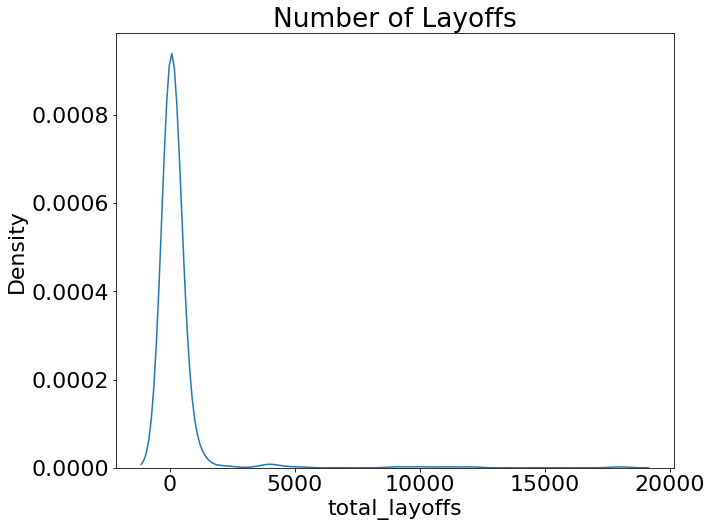

In [40]:
# visualize the distribution of a dataset
plt.figure(figsize=(10,8))
sns.kdeplot(x=df['total_layoffs'])
plt.title('Number of Layoffs')
plt.show()

In [41]:
# convert data type
df['impacted_workforce_percentage'] = df['impacted_workforce_percentage'].apply(lambda x: 0 if not x.isnumeric() else int(x))
df['impacted_workforce_percentage']

0      2
1      2
2      3
3      3
4      3
      ..
484    0
485    0
486    0
487    0
488    0
Name: impacted_workforce_percentage, Length: 489, dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   company                        489 non-null    object        
 1   total_layoffs                  489 non-null    int64         
 2   impacted_workforce_percentage  489 non-null    int64         
 3   reported_date                  489 non-null    datetime64[ns]
 4   industry                       489 non-null    object        
 5   headquarter_location           489 non-null    object        
 6   sources                        489 non-null    object        
 7   status                         489 non-null    object        
 8   Month                          489 non-null    int64         
 9   Year                           489 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 38.3+ KB


Now the data is ready for exploration.

In [43]:
df.to_csv("tech_layoffs_clean.csv")

# Data Exploration and Visualization

In [44]:
top_10 = df.sort_values('total_layoffs', ascending=False).head(10)
top_10

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,Month,Year
378,Amazon,18000,5,2023-01-05,saas,seattle,Wall Street Journal,Public,1,2023
470,Alphabet,12000,0,2023-01-20,services,ca,CNBC,Public,1,2023
420,Meta,11000,13,2022-11-09,media,ca,CNBC,Public,11,2022
469,Microsoft,10000,0,2023-01-18,software,seattle,Microsoft,Public,1,2023
484,Salesforce,9090,0,2023-01-04,analytics,sanfrancisco,New York Times,Public,1,2023
224,Better.com,5000,50,2022-04-19,fintech,newyork,TechCrunch,Private,4,2022
381,Cisco,4100,5,2022-11-16,saas,ca,Silicon Valley Business Journal,Public,11,2022
475,Peloton,4084,0,2022-10-06,fitness,newyork,CNBC,Public,10,2022
466,Carvana,4000,0,2023-01-13,ecommerce,tempe,WSJ,Public,1,2023
463,Twitter,3740,70,2023-01-05,media,sanfrancisco,The Information,Public,1,2023


In [45]:
# !pip install matplotlib --upgrade --user

In [46]:
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.7.1


### Top 10 Layoffs By Company Name

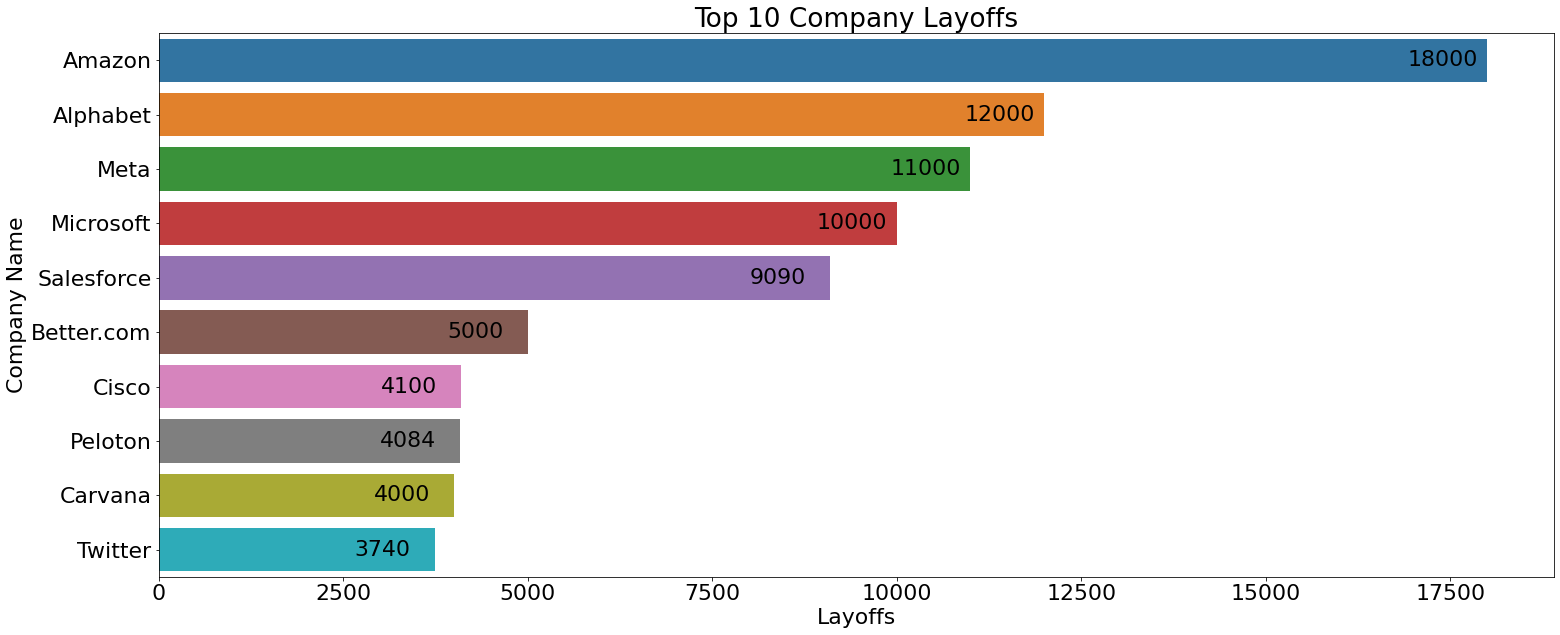

In [47]:
fig, ax = plt.subplots(figsize=(25, 10))

p=sns.barplot(x="total_layoffs", y="company", data=top_10,
              ax=ax)
for container in p.containers:
    p.bar_label(container,padding=-80)
    
plt.title("Top 10 Company Layoffs")
plt.xlabel('Layoffs')
plt.ylabel('Company Name')
plt.show()

### Top 10 Layoffs By Industry

<BarContainer object of 10 artists>


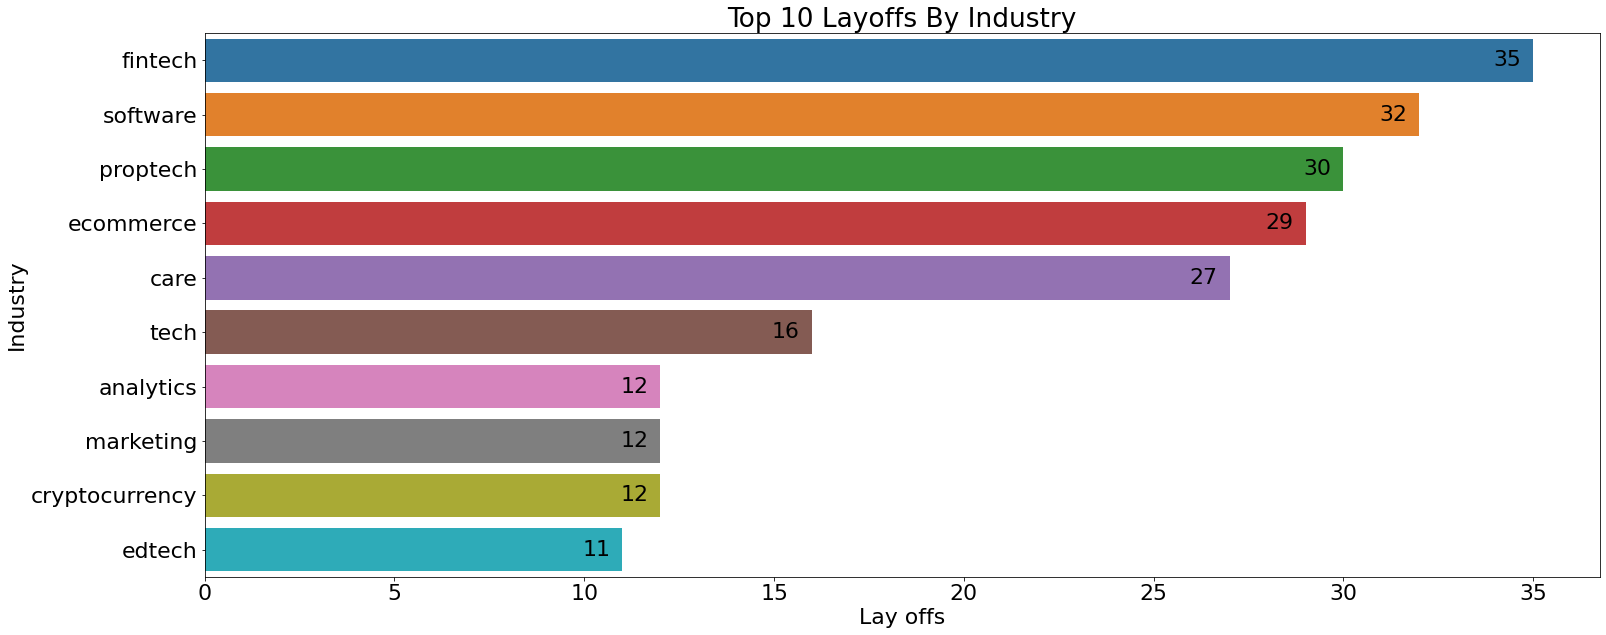

In [48]:
fig, ax = plt.subplots(figsize=(25, 10))

# top_10_industries = df['industry'].value_counts().head(10)
top_10_industries = df.groupby('industry').size().sort_values(ascending=False).head(10)
top_10_industries = top_10_industries.to_frame().reset_index()

p = sns.barplot(x=0, y='industry', data=top_10_industries, ax=ax)
for container in p.containers:
    p.bar_label(container, padding=-40)
    print(container)
    
plt.title("Top 10 Layoffs By Industry")
plt.ylabel('Industry')
plt.xlabel('Lay offs')
plt.show()

### Top 10 Layoffs By HQ Location

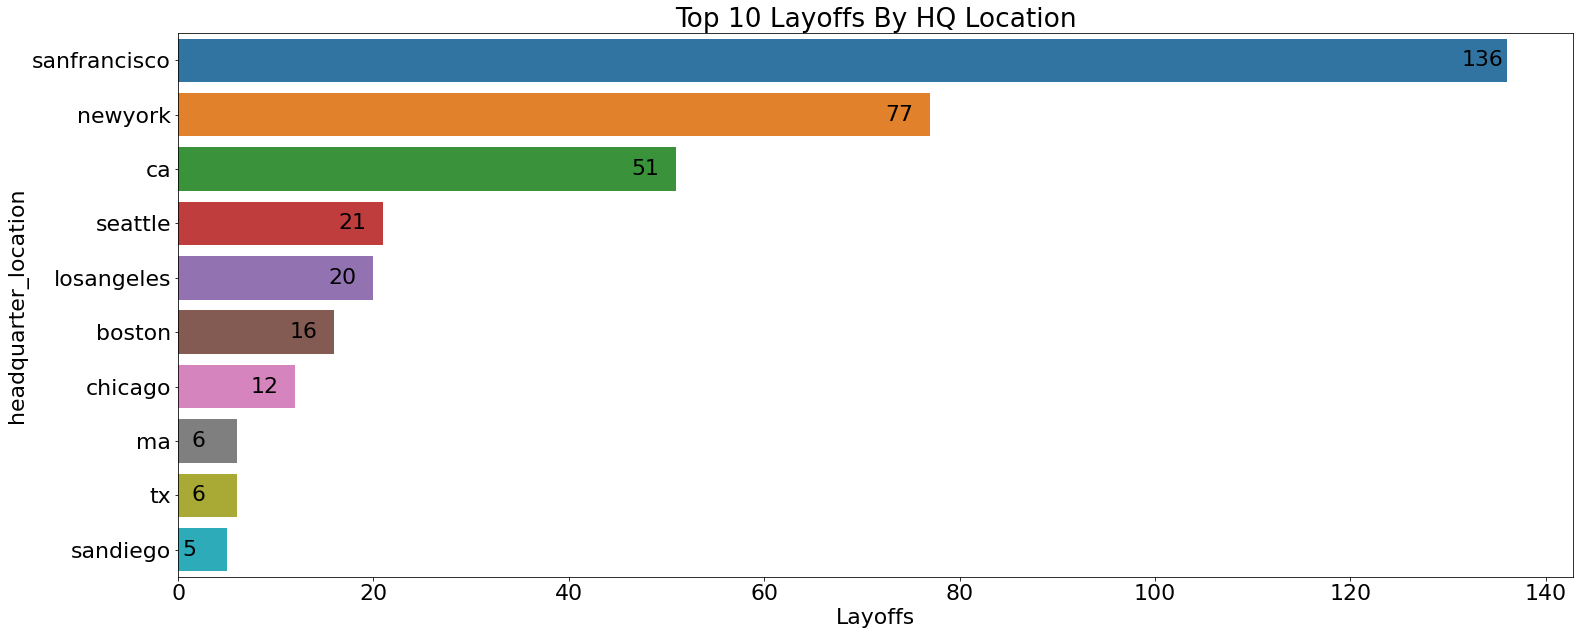

In [49]:
fig, ax = plt.subplots(figsize=(25, 10))
# top_10_locations = df['headquarter_location'].value_counts().head(10)
top_10_locations = df.groupby('headquarter_location').size().sort_values(ascending=False).head(10)
top_10_locations = top_10_locations.to_frame().reset_index()

p = sns.barplot(y='headquarter_location', x=0, data=top_10_locations, ax=ax)
for container in p.containers:
    p.bar_label(container, padding=-45)
    
plt.title("Top 10 Layoffs By HQ Location")
plt.ylabel("headquarter_location")
plt.xlabel('Layoffs')
plt.show()

### Layoffs By IPO status

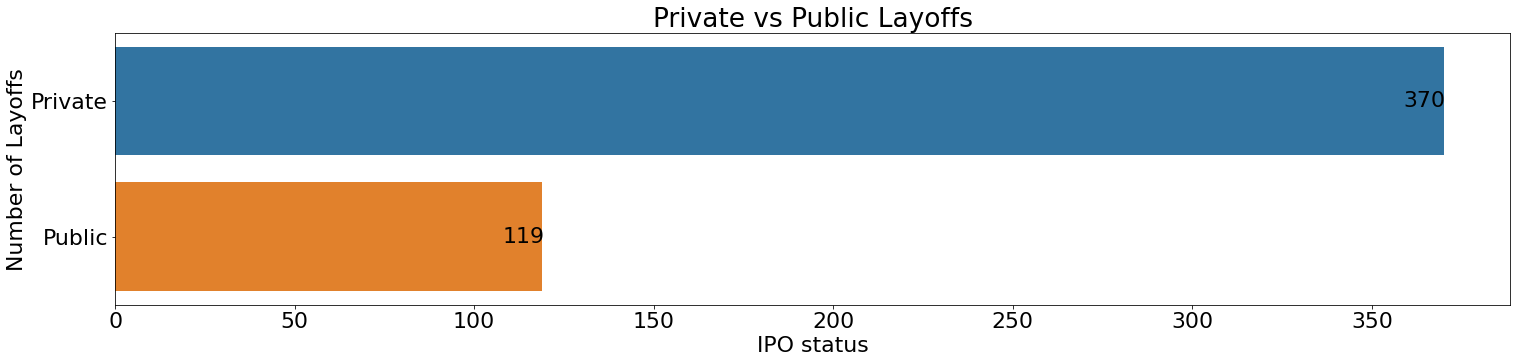

In [50]:
fig, ax = plt.subplots(figsize=(25, 5))
df_status = df.groupby('status').size().sort_values(ascending=False)
df_status = df_status.to_frame().reset_index()

p = sns.countplot(y='status', data=df, ax=ax)
for container in p.containers:
    p.bar_label(container, padding=-40)
plt.title("Private vs Public Layoffs")
plt.ylabel('Number of Layoffs')
plt.xlabel('IPO status')
plt.show()

### Layoffs By Year

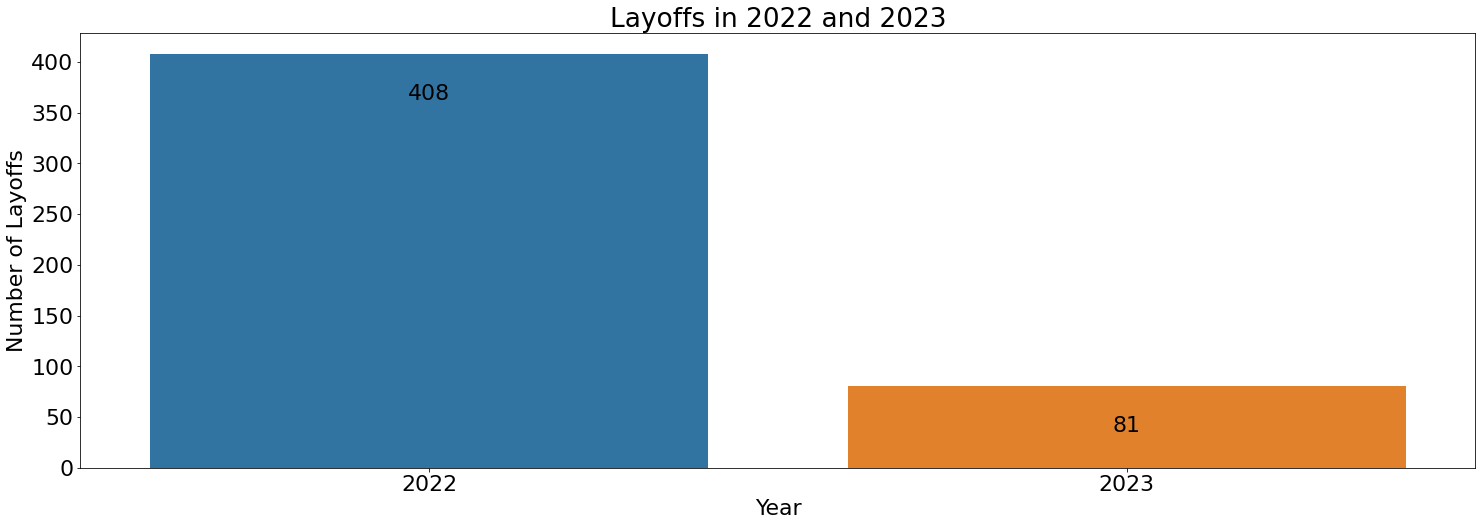

In [51]:
fig, ax = plt.subplots(figsize=(25, 8))
p = sns.countplot(x="Year", data=df, ax=ax)

for container in p.containers:
    p.bar_label(container, padding=-50)

plt.title("Layoffs in 2022 and 2023")
plt.ylabel("Number of Layoffs")
plt.xlabel('Year')
plt.show()

In [52]:
# group the data by month and layoffs; and calculate the total layoffs
month_layoffs = df.groupby(["Month"])["total_layoffs"].count().reset_index()
month_layoffs

,Month,total_layoffs
0,1,82
1,2,2
2,3,5
3,4,10
4,5,29
5,6,57
6,7,55
7,8,52
8,9,33
9,10,40


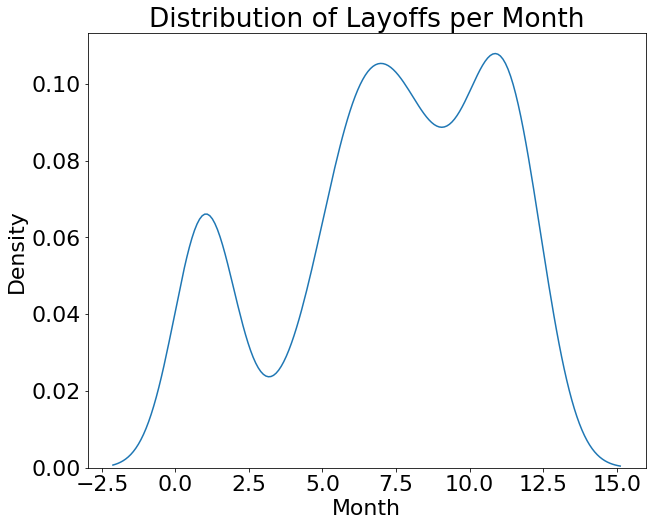

In [53]:
plt.figure(figsize=(10,8))
sns.kdeplot(x=df['Month'])
plt.title('Distribution of Layoffs per Month')
plt.show()

### Layoffs By Month

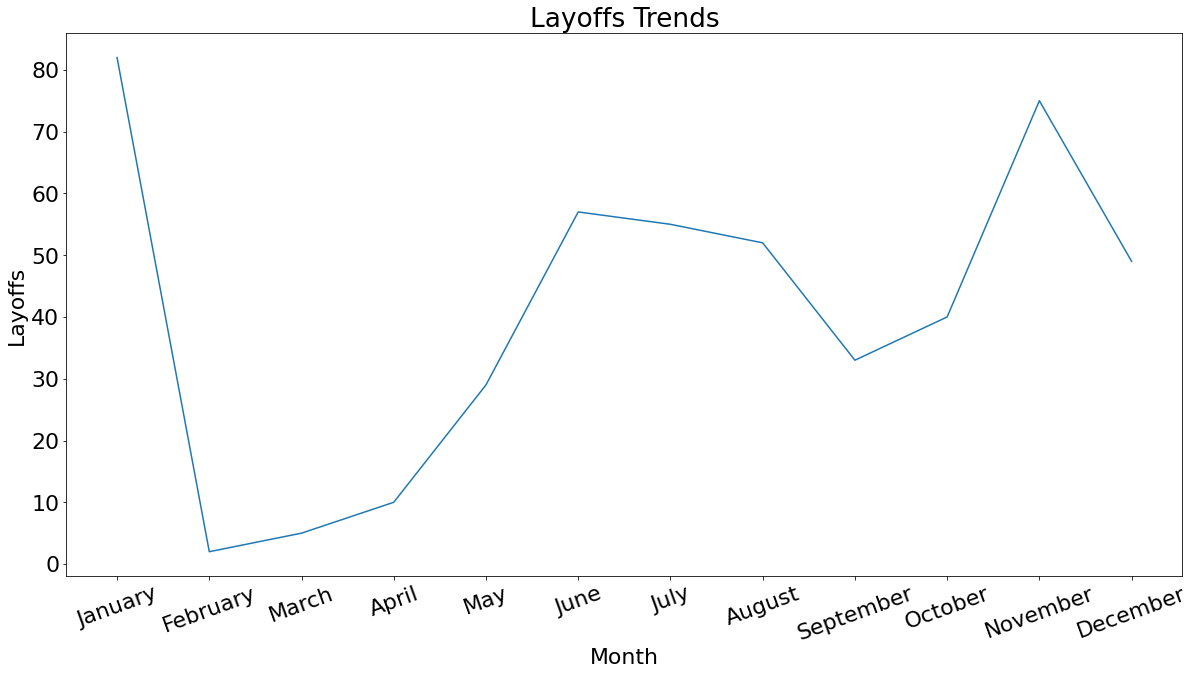

In [56]:
import calendar
plt.figure(figsize=(20, 10))

# build line chart
sns.lineplot(x="Month", y="total_layoffs", data=month_layoffs)
plt.title("Layoffs Trends")
plt.ylabel("Layoffs")
plt.xlabel("Month")

# set x-tick labels as the names of months
plt.xticks(range(1,13), [calendar.month_name[i] for i in range(1,13)], rotation=20)
plt.show()